# O PROBLEMA

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados do IBOVESPA (Bolsa de Valores) para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período 'diário', com intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

1. O modelo com storytelling, desde a captura do dado até a entrega do modelo;
2. Justificar a técnica utilizada;
3. Atingir uma acurácia adequada (acima de 70%).

Dica: utilize o maior intervalo de tempo possível para atingir maior acurácia no modelo preditivo.

Fonte: https://br.investing.com/indices/bovespa-historical-data

## Importando bibliotecas

In [131]:
import warnings 
warnings.filterwarnings(action = 'ignore')

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importando dados

In [133]:
df = pd.read_csv('Dados Históricos - Ibovespa.csv')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      2478 non-null   object 
 1   Último    2478 non-null   float64
 2   Abertura  2478 non-null   float64
 3   Máxima    2478 non-null   float64
 4   Mínima    2478 non-null   float64
 5   Vol.      2477 non-null   object 
 6   Var%      2478 non-null   object 
dtypes: float64(4), object(3)
memory usage: 135.6+ KB


In [135]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
1,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
2,04.08.2023,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
3,03.08.2023,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
4,02.08.2023,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


## Tratamento de dados

In [136]:
#verificando ocorrência de dados nulos
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [137]:
df[df['Vol.'].isnull()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1860,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [138]:
df.drop(1860, inplace = True)
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [139]:
#verificando valores duplicados
df.duplicated().sum()

0

In [140]:
#verificando ocorrência de espaçamentos
espacamento_encontrado = False

for column in df.columns:
    for index, value in df[column].items():
        if isinstance(value, str) and value.isspace():
            print(f'Espaçamento encontrado na coluna "{column}", linha {index}.')
            espacamento_encontrado = True

if not espacamento_encontrado:
    print('Não há espaçamento nos dados.')

Não há espaçamento nos dados.


In [141]:
#renomeando colunas
df.rename(columns = {
    'Data': 'data', 
    'Último': 'ultimo', 
    'Abertura': 'abertura', 
    'Máxima': 'maxima', 
    'Mínima': 'minima', 
    'Vol.': 'volume', 
    'Var%': 
    'variacao'}, inplace = True)
df.columns

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')

In [142]:
#alterando tipo da coluna de data
df['volume'] = df['volume'].str.replace(',', '.')
df['volume'] = df['volume'].str.replace('K', '')
df['volume'] = df['volume'].str.replace('M', '').astype(float)
df['variacao'] = df['variacao'].str.replace(',', '.')
df['variacao'] = df['variacao'].str.replace('%', '').astype(float)
df['data'] = df['data'].str.replace('.', '-')
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')

In [143]:
df.head(3)

,data,ultimo,abertura,maxima,minima,volume,variacao
0,2023-08-08,119.090,119.378,119.553,117.492,10.25,-0.24
1,2023-08-07,119.380,119.509,120.104,118.894,8.73,-0.11
2,2023-08-04,119.508,120.586,121.442,119.215,15.07,-0.89


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2477
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      2477 non-null   datetime64[ns]
 1   ultimo    2477 non-null   float64       
 2   abertura  2477 non-null   float64       
 3   maxima    2477 non-null   float64       
 4   minima    2477 non-null   float64       
 5   volume    2477 non-null   float64       
 6   variacao  2477 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 154.8 KB


In [145]:
df.set_index('data', inplace = True)
df.head()

,ultimo,abertura,maxima,minima,volume,variacao
data,,,,,,
2023-08-08,119.090,119.378,119.553,117.492,10.25,-0.24
2023-08-07,119.380,119.509,120.104,118.894,8.73,-0.11
2023-08-04,119.508,120.586,121.442,119.215,15.07,-0.89
2023-08-03,120.586,120.859,122.619,120.365,13.03,-0.23
2023-08-02,120.859,121.249,121.252,119.798,10.57,-0.32


In [146]:
df = df['ultimo'].to_frame(name = 'ultimo')
df

,ultimo
data,
2023-08-08,119.090
2023-08-07,119.380
2023-08-04,119.508
2023-08-03,120.586
2023-08-02,120.859
...,...
2013-08-14,50.896
2013-08-13,50.601
2013-08-12,50.299


## Decompondo a série

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose #lib para decompor série temporal
from statsmodels.tsa.stattools import acf, pacf #autocorrelação e autocorrelação parcial

In [148]:
df.sort_index(inplace = True)

In [149]:
resultados = seasonal_decompose(df, period = 7)

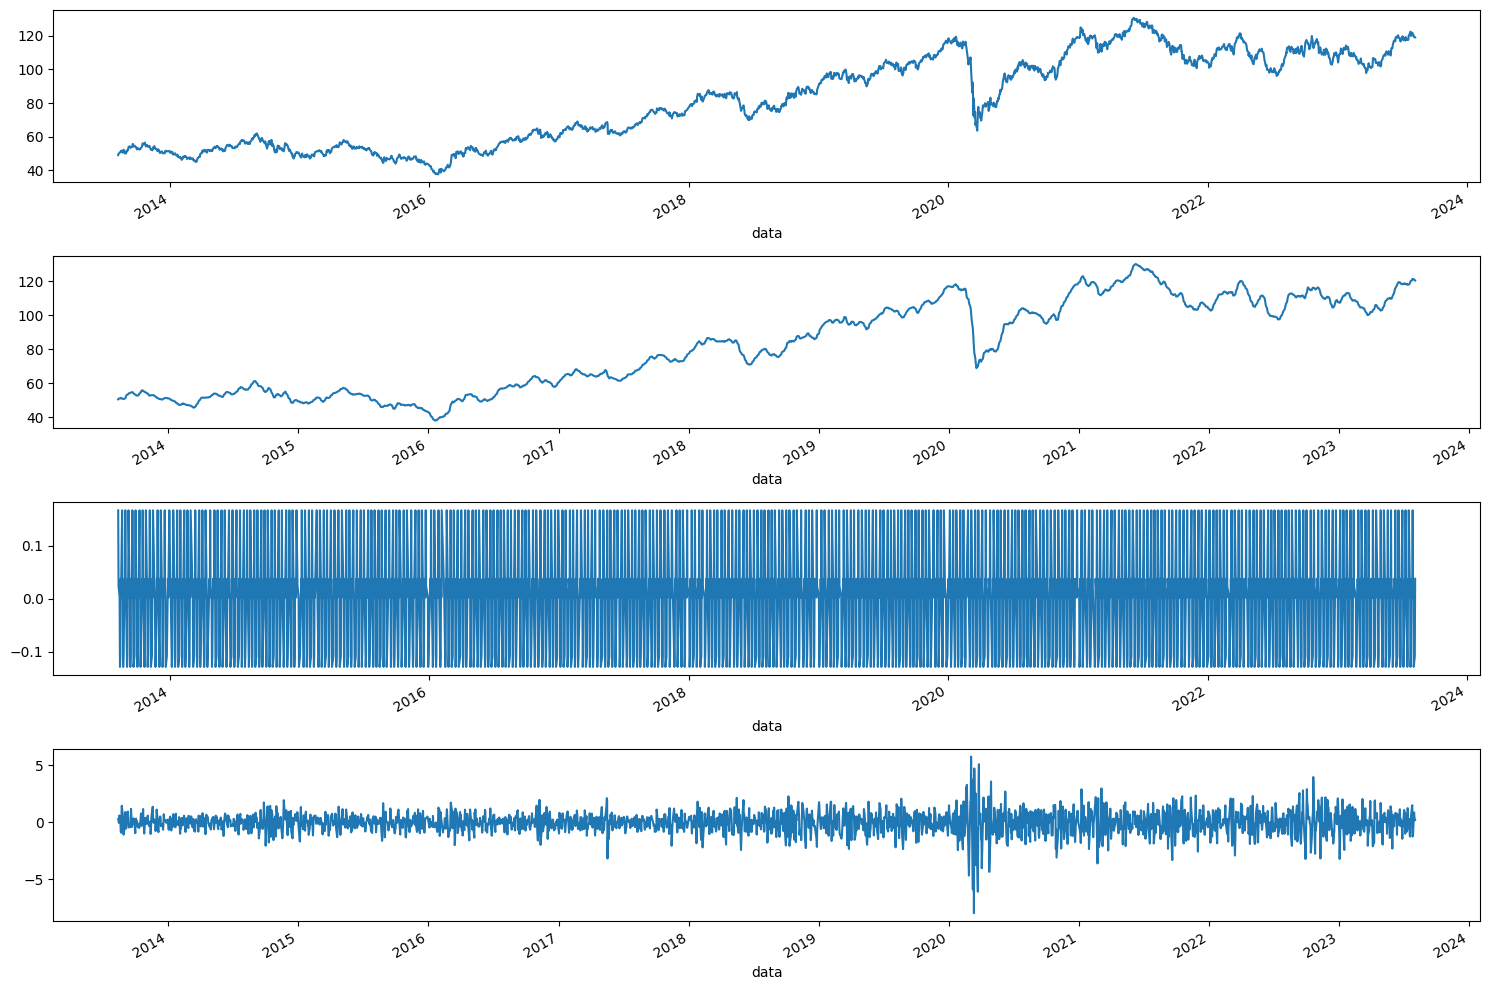

In [150]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 10))
resultados.observed.plot(ax = ax1)
resultados.trend.plot(ax = ax2)
resultados.seasonal.plot(ax = ax3)
resultados.resid.plot(ax = ax4)
plt.tight_layout()

### ADF - Augmented Dickey-Fuller

>H0 - Hipótese Nula (não é estacionária)

>H1 - Hipótese Alternativa (rejeita a hipótese nula)

**p-valor <= 0.05 rejeitamos H0 com um nível de confiança de 95%**

In [151]:
from statsmodels.tsa.stattools import adfuller

In [152]:
X = df.ultimo.values

result = adfuller(X)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'P-valor: {result[1]}')
print(f'Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -1.112430950257849
P-valor: 0.7100892122627266
Valores críticos:
	1%: -3.4330013210750745
	5%: -2.8627113331035243
	10%: -2.567393547066656


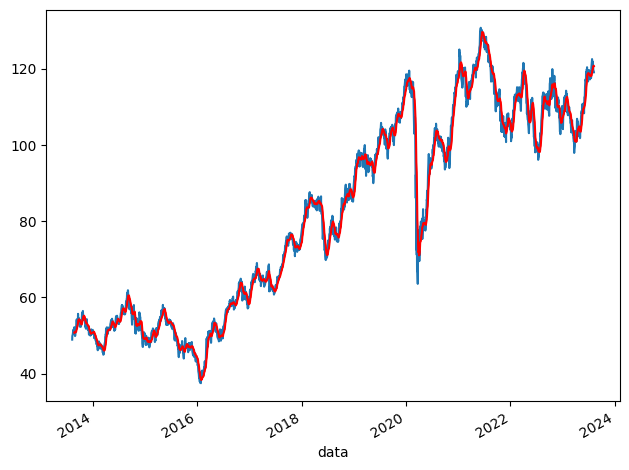

In [153]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()

df.plot(ax = ax, legend = False)
ma.plot(ax = ax, legend = False, color = 'r')
plt.tight_layout()

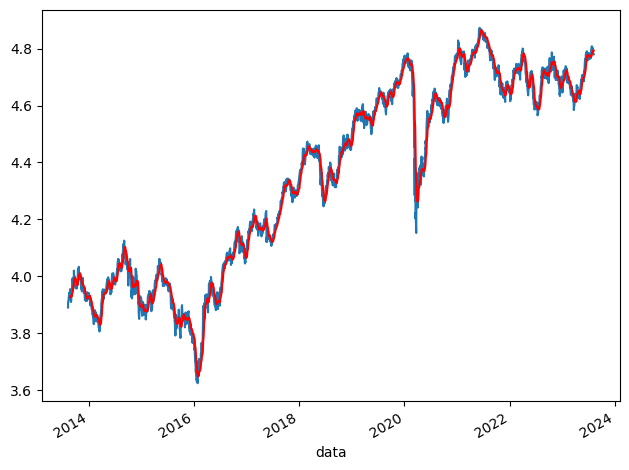

In [154]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax = ax, legend = False)
ma_log.plot(ax = ax, legend = False, color = 'r')
plt.tight_layout()

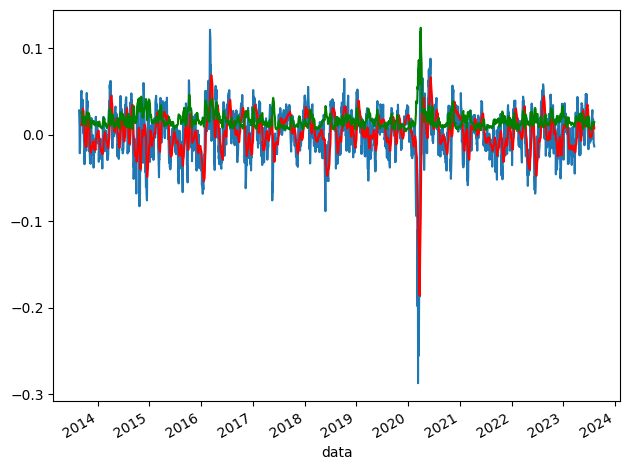

In [155]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std_s = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax = ax, legend = False)
ma_s.plot(ax = ax, legend = False, color = 'r')
std_s.plot(ax = ax, legend = False, color = 'g')
plt.tight_layout()

In [156]:
X_s = df_s.ultimo.values

result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste estatístico: {result_s[0]}')
print(f'P-valor: {result_s[1]}')
print(f'Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -12.81503724156076
P-valor: 6.326846328474345e-24
Valores críticos:
	1%: -3.433013198647963
	5%: -2.862716578179761
	10%: -2.5673963396253145


Teste ADF
Teste estatístico: -15.915036403258924
P-valor: 8.042558657510306e-29
Valores críticos:
	1%: -3.4330328659222165
	5%: -2.8627252631029694
	10%: -2.5674009636186508


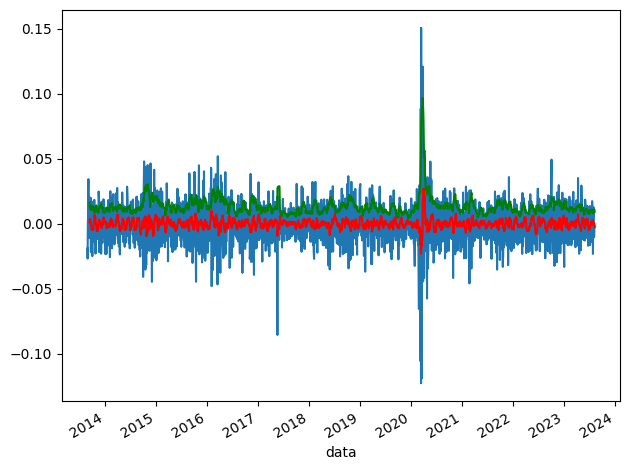

In [157]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax = ax, legend = False)
ma_diff.plot(ax = ax, legend = False, color = 'r')
std_diff.plot(ax = ax, legend = False, color = 'g')
plt.tight_layout()

X_diff = df_diff.ultimo.dropna().values

result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste estatístico: {result_diff[0]}')
print(f'P-valor: {result_diff[1]}')
print(f'Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

## ARIMA

### ARIMA - AR (autoregressivo) I (integrado) MA (média móvel)

#### A (x, y, z) -> ACF, PACF

In [158]:
lag_acf = acf(df_diff.dropna(), nlags = 25) #trabalhando na base mensal
lag_pacf = pacf(df_diff.dropna(), nlags = 25)

### 5% ACF

##### 1.96 / sqrt(N - d) -> N (número de pontos da base), d (número de vezes que diferenciamos a base)

In [159]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Modelando

#### **`ARIMA`**

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

*   **AR**: *Autoregression* : um modelo que usa a relação dependende entre uma observação e alguns lags.

*   **I**: *Integrated*  : uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [160]:
from pandas.plotting import autocorrelation_plot

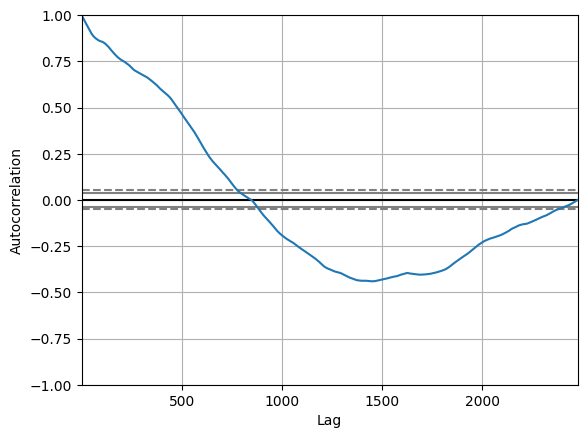

In [161]:
#autocorrelation plot 
autocorrelation_plot(df.values)
plt.show()

In [163]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

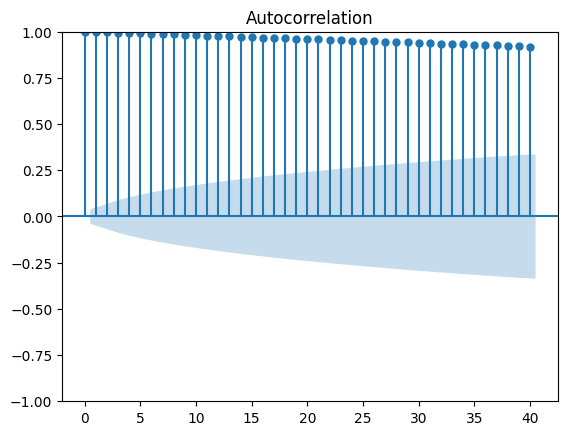

In [164]:
plot_acf(df.values, lags=40)
plt.show()

Modelo ARIMA para análise de dados

In [167]:
#fit model
from statsmodels.tsa.arima.model import ARIMA

In [169]:
#ARIMA(p, d, q)
model = ARIMA(df, order = (7, 1, 1))

In [170]:
model_fit = model.fit()

In [171]:
#summary 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 ultimo   No. Observations:                 2477
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -4117.517
Date:                Sun, 13 Aug 2023   AIC                           8253.034
Time:                        22:57:18   BIC                           8305.363
Sample:                             0   HQIC                          8272.041
                               - 2477                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2447      0.115      2.120      0.034       0.019       0.471
ar.L2          0.0638      0.013      5.043      0.000       0.039       0.089
ar.L3          0.0090      0.011      0.820      0.4

In [172]:
#plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

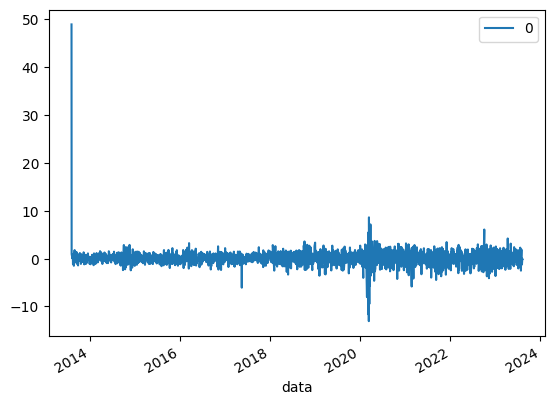

In [174]:
residuals.plot()
plt.show()

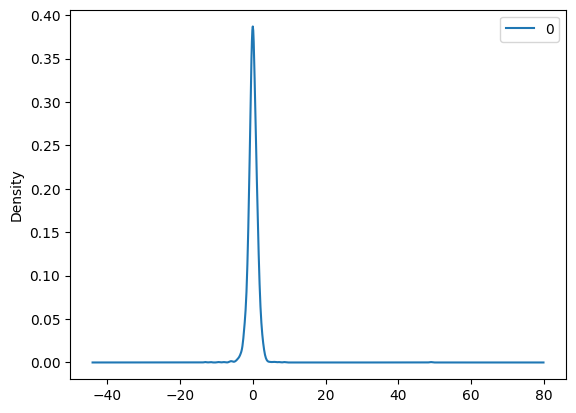

In [176]:
#gráficos de densidade dos residuais
residuals.plot(kind='kde')
plt.show()

In [177]:
#estatística descritiva dos residuos
print(residuals.describe())

                 0
count  2477.000000
mean      0.046071
std       1.610555
min     -13.069967
25%      -0.611319
50%       0.030733
75%       0.742302
max      48.929000


### Prevendo dados com ARIMA utilizando Walk Forward

Separando os dados de treino e teste

In [179]:
#a variável X recebe os dados da série
X = df.values
X = X.astype('float32')

In [180]:
#separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.5)

In [181]:
#separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [182]:
#cria a variável history
history = [x for x in train]

In [183]:
#cria lista de previsões
predictions = list()

In [184]:
#cria a função que faz a diferenciação
def difference(dataset, interval = 1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

#cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval = 1):
  return previsao + history[-interval]

In [185]:
#inicia Walk-Forward
for t in range(len(test)):
  
  #difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)

  #cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order = (0, 0, 1))

  #treina o modelo ARIMA
  model_fit = model.fit(trend = 'nc', disp = 0)

  #a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  #valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
    
  #adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)

  #a variável valor_real recebe o valor real do teste
  valor_real = test[t]

  #adiciona o valor real a variável history
  history.append(valor_real)

  #imprime valor predito e valor real
  print('Valor predito = %.3f, Valor esperado = %3.f' % (valor_predito, valor_real))

TypeError: ARIMA.fit() got an unexpected keyword argument 'trend'

In [ ]:
#avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 785.401


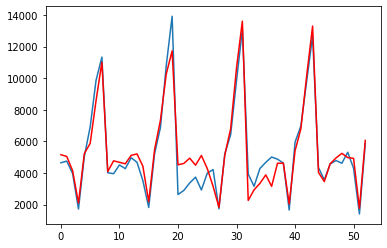

In [ ]:
#plot forecasts against actual outcomes 
plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [ ]:
#erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
#converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [ ]:
#imprime as 5 primeiras linhas
residuals.head()

,0
0,191.892715
1,185.316899
2,273.910350
3,38.044217
4,303.168595


In [ ]:
#estatística descritiva
residuals.describe()

,0
count,53.000000
mean,129.128269
std,782.127058
min,-2048.849021
25%,-264.302025
50%,130.479900
75%,405.685576
max,2367.304868


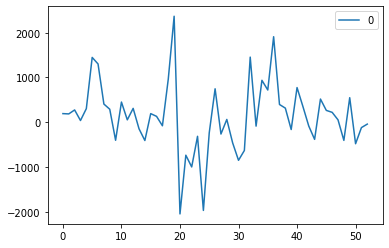

In [ ]:
#plot residuals
residuals.plot()
pyplot.show()

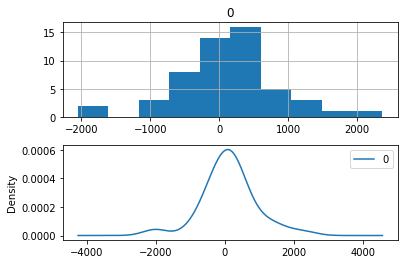

In [ ]:
#plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax = plt.gca())

pyplot.subplot(212)
residuals.plot(kind = 'kde', ax = plt.gca())
pyplot.show()

In [ ]:
#importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

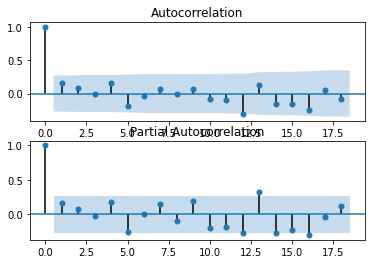

In [ ]:
#plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax = plt.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax = plt.gca())
pyplot.show()

In [ ]:
'''#grid search ARIMA parameters for time series
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	#make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	#calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

#evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float('inf'), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))'''